In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
from six.moves import range

print(tf.__version__)

1.6.0


# Unload Pickle Files (Compressed Dataset)

In [3]:
pickle_file = './ResizedData/complete_dataset.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_images = save['train_dataset']
    train_labels = save['train_labels']
    test_images = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_images.shape, train_labels.shape)
    print('Test set', test_images.shape, test_labels.shape)

Training set (1200, 10, 10) (1200,)
Test set (299, 10, 10) (299,)


In [4]:
class_names = {0:'Not GCP',1:'GCP'}

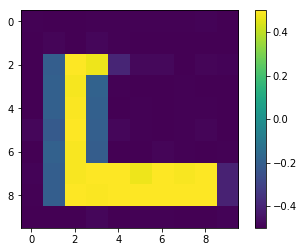

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

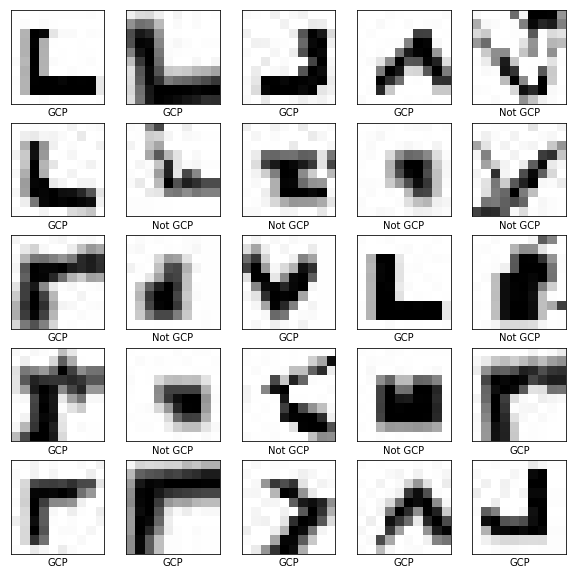

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Train feed forward neural network

## - input layer - 1200 * 10 * 10 = 120000 neurons
## - 1st hidden layer - 70 neurons - relu activation function
## - Dropout with 0.5 probable dropouts
## - 2nd hidden layer - 40 neurons - relu activation function
## - 3rd hidden layer - 45 neurons - relu activation function

## Output Layer - softmax with 2 neurons (0 and 1)

## Train model using ADAM OPTIMIZER

# training accuracy - 90.42 %
# test accuracy - 89.63 % 

In [157]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10, 10)),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(45, activation='relu'),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1200/1200 [==============================]1200/1200 [==============================] - 3s 2ms/step - loss: 0.6134 - acc: 0.6650

Epoch 2/20
1200/1200 [==============================]1200/1200 [==============================] - 0s 294us/step - loss: 0.4714 - acc: 0.7717

Epoch 3/20
1200/1200 [==============================]1200/1200 [==============================] - 0s 281us/step - loss: 0.4408 - acc: 0.7883

Epoch 4/20
1200/1200 [==============================]1200/1200 [==============================] - 0s 257us/step - loss: 0.4030 - acc: 0.8192

Epoch 5/20
1200/1200 [==============================]1200/1200 [==============================] - 0s 356us/step - loss: 0.3731 - acc: 0.8317 0s - loss: 0.3961 - acc: 0

Epoch 6/20
1200/1200 [==============================]1200/1200 [==============================] - 0s 348us/step - loss: 0.3735 - acc: 0.8392

Epoch 7/20
1200/1200 [==============================]1200/1200 [==============================] - 0s 288us/step - loss: 0.3

In [158]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

299/299 [==============================]299/299 [==============================] - 1s 5ms/step

Test accuracy: 0.896321070034767


In [159]:
predictions = model.predict(test_images)

print(np.argmax(predictions[100]))
print(test_labels[100])

1
1


# Plot the image and its corresponding bar graph with red bar for wrong output and blue for right output 

In [140]:
def plot_image(i, predictions_array, true_label, img):
      predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
  
      plt.imshow(img, cmap=plt.cm.binary)

      predicted_label = np.argmax(predictions_array)
      if predicted_label == true_label:
        color = 'blue'
      else:
        color = 'red'
  
      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
      predictions_array, true_label = predictions_array[i], true_label[i]
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      thisplot = plt.bar(range(2), predictions_array, color="#777777")
      plt.ylim([0, 1]) 
      predicted_label = np.argmax(predictions_array)
 
      thisplot[predicted_label].set_color('red')
      thisplot[true_label].set_color('blue')

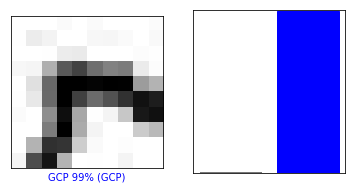

In [141]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

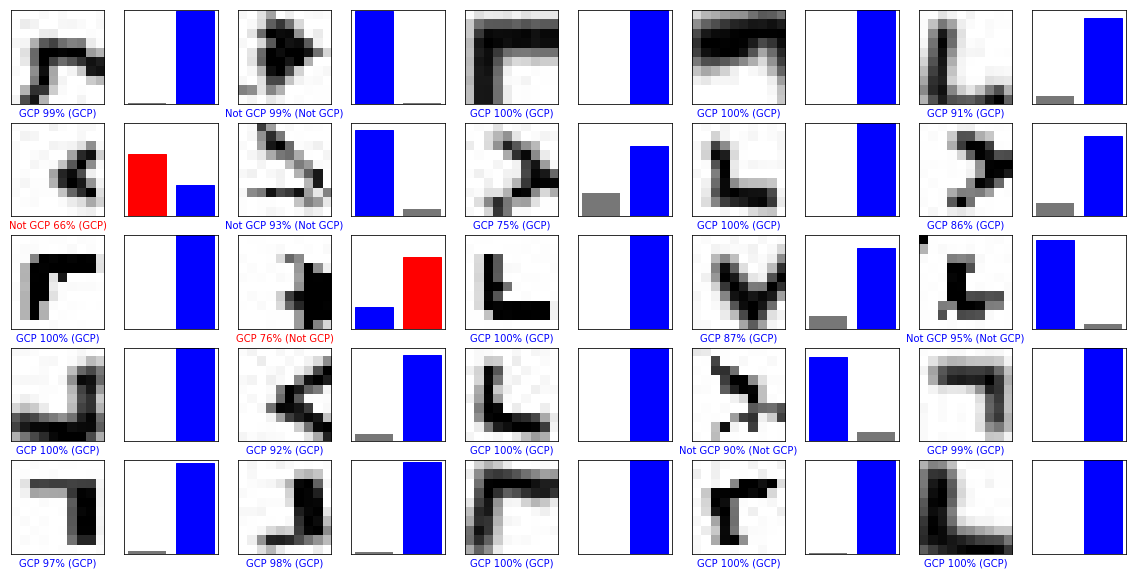

In [143]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


(10, 10)
(1, 10, 10)
[[0.00492186 0.9950781 ]]


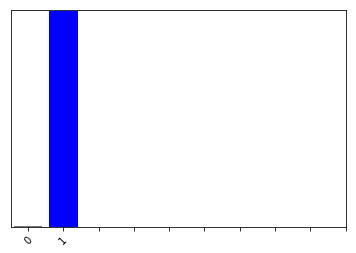

In [161]:
# img to test the data
img = test_images[0]
print(img.shape)
# Add the image to a batch where it's the only member. (10,10) -> (1,10,10)
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# Save the model as 'GCP_Detection_Model.h5' for further use

In [162]:
from keras.models import load_model
model.save('GCP_Detection_Model.h5')
del model
model = load_model('GCP_Detection_Model.h5')
def predictValue(img):
    #input img must be a grayscale image of size 10 * 10
    img = (np.expand_dims(img,0))
    predictions_single = model.predict(img)
    return np.argmax(predictions_single[0])
    

c:\users\shivangi pandey\appdata\local\programs\python\python36\lib\site-packages\keras\models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [164]:
# Number of true predicted values from 858 true values
import cv2
import os
path = './ResizedData/true'
v = 0
for ls in os.listdir(path):
    i = cv2.imread(os.path.join(path,ls))
    image = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    if(predictValue(image) == 1):
        v += 1
print(v)

726
